# Monte Carlo Algorithms in DS and ML 
## by Warren Birkman

In [400]:
import warnings
warnings.filterwarnings('ignore')

# Calculate Pi
* We have a circle centered at the origin of the xy planes with radius 1
* We have n (x,y) points uniformally sampled from [-1,1]x[-1,1]
* We find m (x,y) points in the circle, where m is initially 0
* We can find pi = 4m/n where as n approaches infinity, 4m/n approaches pi
    * length and width of the box are 2, 2x2 = 4
    * radius is 1, area of a circle is pi x (r squared)
    * probability is thus pi/4
    * if n is the number of points we'll place and m is the number of points in the circle then m = pi(n) / 4
    * thus pi = 4m/n

In [58]:
import random
def montePi(n):
    m = 0
    for i in range(n):
        x,y = random.uniform(-1,1),random.uniform(-1,1)
        if (x**2 + y**2) <= 1:
            m+=1
    return (4*m)/n

print("1,000 iterations:", montePi(1_000))
print("1 million iterations:", montePi(1_000_000))

1,000 iterations: 3.16
1 million iterations: 3.140724


# Simulated Annealing
* We want to find the highest point on a hill
* We have a hill with random heights all around
* We want to find the height given a position
* We then want to travel around our hill with the temperature being our eagerness guide (the lower the temp the more eager we are), and the cooling rate will determine how quickly we reach this conclusion of our highest point

In [396]:
import numpy as np
import random
import math

hill = np.random.rand(1000) # values 0->1

def height(position):
    return hill[position]

def simulated_annealing(hill, initial_position, initial_temp, cooling_rate):
    current_position = initial_position
    current_height = height(current_position)

    while initial_temp > 0.001:
        # choose a new random position within the hill
        new_position = random.randint(0, len(hill) - 1)
        new_height = height(new_position)

        # if the new position is higher, move there, else decide whether to move there or not
        if (new_height > current_height) or (random.random() < math.exp((new_height - current_height) / initial_temp)):
            current_position, current_height = new_position, new_height

        # decrease the temperature
        initial_temp *= cooling_rate

    return current_position, current_height

initial_position = random.randint(0, len(hill) - 1)
print(f"Peak:\n \tPosition: {simulated_annealing(hill, initial_position, 100, 0.999)[0]}\n\tHeight: {simulated_annealing(hill, initial_position, 100, 0.999)[1]}", )


Peak:
 	Position: 803
	Height: 0.9974318317838778


# Monte Carlo Simulation for Stock Price
* We need stock price data from yahoo finance, I chose "SPY" as our ticker
* The logarithmic returns are useful providing a long term understanding of price changes for many reasons:
    * takes into account growth rates, time additive, returns are symmetric, better likelihood of a normal statistical distribution, reflect the effect of compounding which helps us better undersand overall return
* Then we run the monte carlo simulation, which generates a set 1000 potential future price paths for the stock, each representing a possible sequence of daily prices over one year
    * Eah day the change in price is randomly drawn using a normal distribution with a mean of 0 and a std dev. equal to the std dev. of the historical log returns (volatility). 
    * This random price change is then applied to the most recent price to get the next price in the path.
    * This is simplification, but often used for models such as this

[*********************100%***********************]  1 of 1 completed


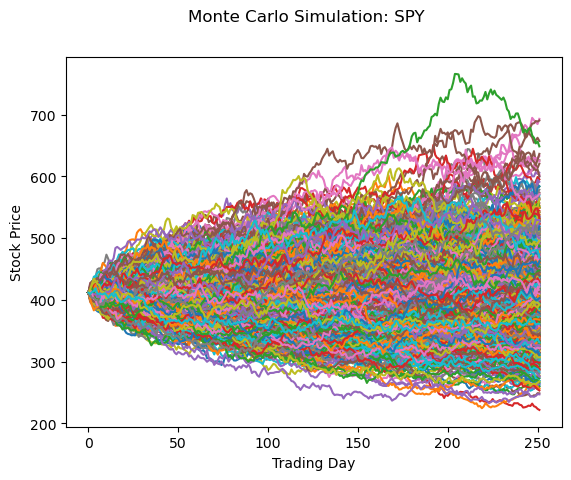

In [404]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

ticker = "SPY"
ticker_data = yf.download(ticker,'2010-1-1','2023-5-14')

# calculate logarithmic returns
ticker_data['Log_Return'] = np.log(ticker_data['Close'] / ticker_data['Close'].shift())

# monte Carlo simulation of future prices
num_simulations = 1000
num_days = 252   # number of trading days in a year

simulation_df = pd.DataFrame()

for x in range(num_simulations):
    count = 0
    daily_vol = ticker_data['Log_Return'].std()
    
    price_series = []
    
    price = ticker_data['Close'][-1] # start with the last known price
    price_series.append(price)
    
    for y in range(num_days):
        if count == 251:
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_vol))
        price_series.append(price)
        count += 1
    
    simulation_df[x] = price_series

fig = plt.figure()
fig.suptitle('Monte Carlo Simulation: SPY')
plt.plot(simulation_df)
plt.xlabel('Trading Day')
plt.ylabel('Stock Price')
plt.show()